**Table of contents**<a id='toc0_'></a>    
- [N2 Excited State Data](#toc1_)    
- [NH3 Excited States](#toc2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[N2 Excited State Data](#toc0_)



just use pandoc style citations [@haupt2022; @laughlinTheory2000] and worry about matching citations when building in LaTeX (use pandoc to convert these)


In [171]:
from IPython.display import Markdown, display
import pandas as pd

display_csv = lambda f: display(Markdown(pd.read_csv(f,comment="#").to_markdown(index=False)))
display_md = lambda f: display(Markdown(open(f).read()))

In [172]:
import pandas as pd

from uncertainties import unumpy
from uncertainties import ufloat, ufloat_fromstr
from uncertainties.core import UFloat
from math import isnan

def format_ufloat(x):
    if isinstance(x, type(ufloat(1, 1))):
        return f"{x:+.1uS}"  # Uses the shorthand format
    return x

def col2ufloat(col):
    return [ufloat_fromstr("nan") if pd.isna(x) else ufloat_fromstr(x) for x in col]

def display_formatted(df):
    # Create a copy to avoid modifying original
    display_df = df.copy()

    # Format ufloat columns
    for col in df.columns:
        if isinstance(df[col].iloc[0], UFloat):
            display_df[col] = df[col].apply(lambda x: f"{x:+.1uS}")

    display(display_df)

def get_state_values(filename):
    # read in data
    df = pd.read_csv(filename, comment='#', skipinitialspace=True)
    df = df.map(lambda x: x.strip() if isinstance(x, str) else x) # strip data
    df.rename(columns=lambda x: x.strip(), inplace=True) # strip headers too

    # handle NaNs as ufloats as well
    df["avdz"] = col2ufloat(df["avdz"])
    df["avtz"] = col2ufloat(df["avtz"])

    if "avqz" in df.columns: df["avqz"] = col2ufloat(df["avqz"])

    # display_formatted(df)

    # Get gs values as a series
    gs_values = df[df['state'] == 'gs'].iloc[0]
    # display(gs_values)

    # Create new dataframe excluding gs
    diff_df = df[df['state'] != 'gs'].reset_index(drop=True).copy()

    cols_to_diff = df.columns[1:]  # All columns except first
    for col in cols_to_diff:
        # display(diff_df[col])
        # display(gs_values[col])
        diff_df[col] = diff_df[col] - gs_values[col]
    for col in diff_df.columns[1:]:
        diff_df[col] *= 1000
    # display_formatted(diff_df)

    return df, diff_df
    # type(df["avdz"][1])

In [173]:
df = pd.read_csv("N2_casci_states.csv", comment='#', skipinitialspace=True)

display(df)

,state,avdz,avtz,avqz
0,gs,-109.4869509(85),-109.535373(13),-109.5425809(75)
1,1Pig,-109.145095(39),-109.196091(45),-109.203097(37)
2,1Sigu-,-109.120941(61),-109.174886(16),-109.1676187(75)
3,1Delu,-109.107147(35),-109.160064(21),-109.167437(26)
4,3Sigu+,-109.201530(12),-109.250314(13),-109.257934(24)
5,3Pig,-109.192064(10),-109.2392879(69),-109.247001(14)
6,3Delu,-109.156060(8),-109.207939(16),-109.131830(14)


In [174]:
df_casscf, dfdiff_casscf = get_state_values("N2_casscf_states.csv")
df_casci, dfdiff_casci = get_state_values("N2_casci_states.csv")

In [175]:
df_exp = pd.read_csv("N2_benchmark.csv", comment='#', skipinitialspace=True)
df_exp = df_exp.map(lambda x: x.strip() if isinstance(x, str) else x) # strip data
df_exp.rename(columns=lambda x: x.strip(), inplace=True) # strip headers too
df_exp["exp1"] *= 37
df_exp["exp2"] *= 37
df_exp["theory"] *= 37
# df.to_csv("N2_benchmark_converted.csv", index=False)

In [176]:
# seem to struggle with singlets but not triplets
print("N2 Loos")
# display_csv("N2_loos.csv")
df_loos = pd.read_csv("N2_loos.csv", comment='#', skipinitialspace=True)
df_loos = df_loos.map(lambda x: x.strip() if isinstance(x, str) else x) # strip data
df_loos.rename(columns=lambda x: x.strip(), inplace=True) # strip headers too
display_formatted(df_loos)

print("N2 Exp")
display_formatted(df_exp)

print("N2 CASSCF")
display_formatted(dfdiff_casscf)

print("N2 CASCI")
display_formatted(dfdiff_casci)


N2 Loos


,state,avdz,avtz,avqz
0,1Pig,345.8,343.2,343.2
1,1Sigu-,369.3,363.1,364.6
2,1Delu,383.3,378.2,378.9
3,3Sigu+,283.0,283.0,284.4
4,3Pig,295.8,294.4,295.1
5,3Delu,329.3,326.0,326.3


N2 Exp


,state,exp1,exp2,theory
0,1Pig,344.47,344.47,342.99
1,1Sigu-,367.04,367.04,373.33
2,1Delu,379.99,379.99,389.98
3,3Sigu+,286.75,286.75,279.72
4,3Pig,297.48,297.48,297.85
5,3Delu,328.56,328.56,330.41


N2 CASSCF


,state,avdz,avtz,avqz
0,1Pig,+340.729(3),+341.79(4),+342.47(3)
1,1Sigu-,+364.794(3),+361.90(2),+366.82(3)
2,1Delu,+377.565(3),+376.73(2),+376.57(4)
3,3Sigu+,+282.681(3),+284.09(1),+286.49(3)
4,3Pig,+292.791(4),+294.63(1),+295.29(3)
5,3Delu,+325.839(3),+325.65(1),+335.63(4)


N2 CASCI


,state,avdz,avtz,avqz
0,1Pig,+341.86(4),+339.28(5),+339.48(4)
1,1Sigu-,+366.01(6),+360.49(2),+374.96(1)
2,1Delu,+379.80(4),+375.31(2),+375.14(3)
3,3Sigu+,+285.42(1),+285.06(2),+284.65(3)
4,3Pig,+294.89(1),+296.09(1),+295.58(2)
5,3Delu,+330.89(1),+327.43(2),+410.75(2)


In [177]:
dfdiff_casscf.to_latex("N2_casscf_diff.tex", index=False)
dfdiff_casci.to_latex("N2_casci_diff.tex", index=False)

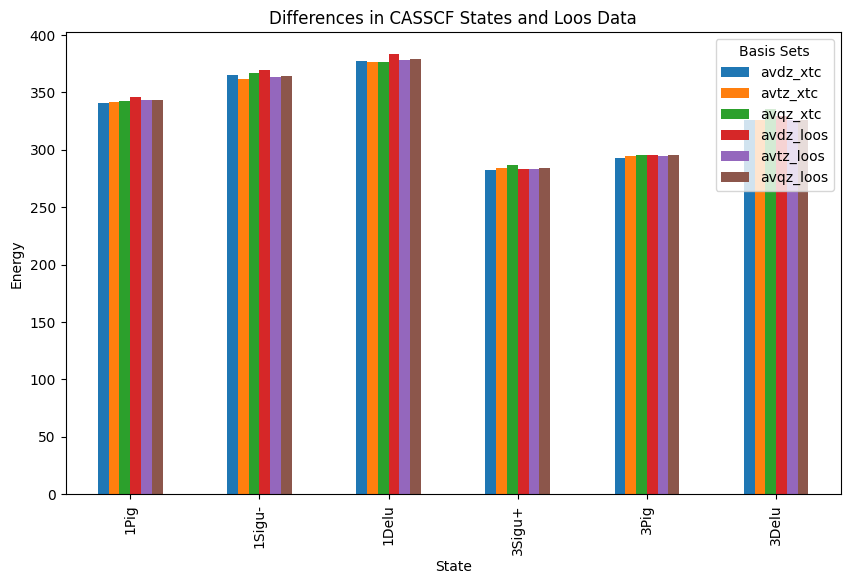

In [178]:
import matplotlib.pyplot as plt
from uncertainties import unumpy

# Extract nominal values from dfdiff_casscf
dfdiff_casscf_nominal = dfdiff_casscf.copy()
for col in dfdiff_casscf.columns[1:]:
    dfdiff_casscf_nominal[col] = unumpy.nominal_values(dfdiff_casscf[col])

# Extract nominal values from df_loos
df_loos_nominal = df_loos.copy()
for col in df_loos.columns[1:]:
    df_loos_nominal[col] = unumpy.nominal_values(df_loos[col])

# Combine the dataframes for plotting
combined_df = dfdiff_casscf_nominal.set_index('state').join(df_loos_nominal.set_index('state'), lsuffix='_xtc', rsuffix='_loos')

# Plot the nominal values
combined_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('State')
plt.ylabel('Energy')
plt.title('Differences in CASSCF States and Loos Data')
plt.legend(title='Basis Sets')
plt.show()

0    342.470+/-0.026
1    366.820+/-0.030
2      376.57+/-0.04
3    286.486+/-0.026
4    295.293+/-0.034
5    335.631+/-0.035
Name: avqz, dtype: object
0    344.47
1    367.04
2    379.99
3    286.75
4    297.48
5    328.56
Name: exp1, dtype: float64
0   -2.000
1   -0.220
2   -3.415
3   -0.264
4   -2.187
5    7.071
Name: avqz, dtype: float64


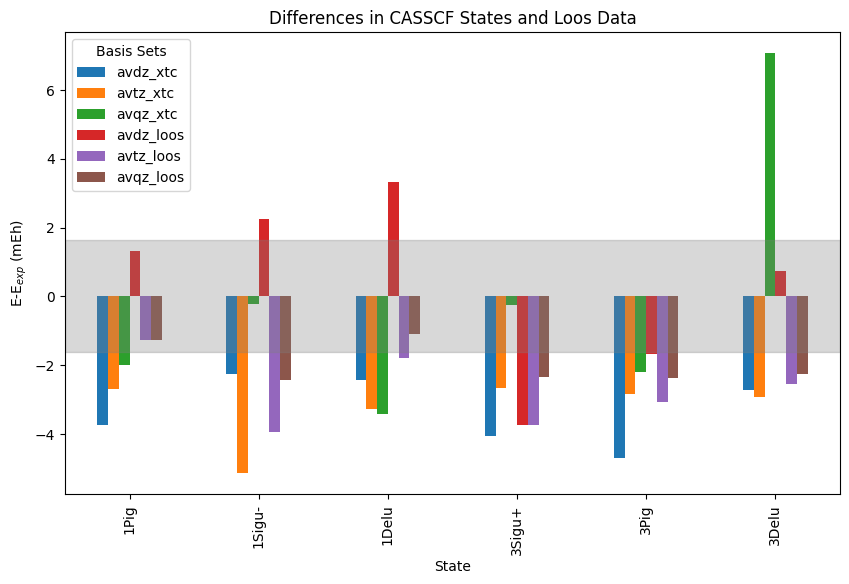

In [179]:
import matplotlib.pyplot as plt
from uncertainties import unumpy

# Extract nominal values from dfdiff_casscf
dfdiff_casscf_nominal = dfdiff_casscf.copy()
for col in dfdiff_casscf.columns[1:]:
    dfdiff_casscf_nominal[col] = unumpy.nominal_values(dfdiff_casscf[col]) - df_exp["exp1"]

# Extract nominal values from df_loos
df_loos_nominal = df_loos.copy()
for col in df_loos.columns[1:]:
    df_loos_nominal[col] = unumpy.nominal_values(df_loos[col]) - df_exp["exp1"]

# display_formatted(df_loos_nominal)
print(dfdiff_casscf["avqz"])
print(df_exp["exp1"])
print(dfdiff_casscf_nominal["avqz"])

# Combine the dataframes for plotting
combined_df = dfdiff_casscf_nominal.set_index('state').join(df_loos_nominal.set_index('state'), lsuffix='_xtc', rsuffix='_loos')

# Plot the nominal values
combined_df.plot(kind='bar', figsize=(10, 6))
plt.axhspan(-1.63, 1.63, color='gray', alpha=0.3)
plt.xlabel('State')
plt.ylabel('E-E$_{exp}$ (mEh)')
plt.title('Differences in CASSCF States and Loos Data')
plt.legend(title='Basis Sets')
plt.show()

# <a id='toc2_'></a>[NH3 Excited States](#toc0_)

In [180]:
df_exp = pd.read_csv("NH3_benchmark.csv", comment='#', skipinitialspace=True)
df_exp = df_exp.map(lambda x: x.strip() if isinstance(x, str) else x) # strip data
df_exp.rename(columns=lambda x: x.strip(), inplace=True) # strip headers too
df_exp["exp1"] *= 37
df_exp["exp2"] *= 37
df_exp["theory"] *= 37
display_formatted(df_exp)
df_exp.to_csv("NH3_benchmark_converted.csv", index=False)

,state,exp1,exp2,theory
0,1E,292.30,293.41,296.74
1,3A2,222.74,NaN,NaN


In [181]:
df_loos = pd.read_csv("NH3_loos.csv", comment='#', skipinitialspace=True)
df_loos = df_loos.map(lambda x: x.strip() if isinstance(x, str) else x) # strip data
df_loos.rename(columns=lambda x: x.strip(), inplace=True) # strip headers too
df_loos["avdz"]
df_loos["avdz"] *= 37
df_loos["avtz"] *= 37
df_loos["avqz"] *= 37
display_formatted(df_exp)
df_loos.to_csv("NH3_loos_converted.csv", index=False)

,state,exp1,exp2,theory
0,1E,292.30,293.41,296.74
1,3A2,222.74,NaN,NaN


In [182]:
df_casscf, dfdiff_casscf = get_state_values("NH3_casscf_states.csv")
df_casci, dfdiff_casci = get_state_values("NH3_casci_states.csv")

In [183]:
# seem to struggle with singlets but not triplets, making me feel there is something wrong
# with the spin penalty
print("NH3 Loos")
display_formatted(df_loos)

print("NH3 CASSCF")
display_formatted(dfdiff_casscf)

print("NH3 CASCI")
display_formatted(dfdiff_casci)

print("NH3 Exp")
display_formatted(df_exp)

NH3 Loos


,state,avdz,avtz,avqz
0,1E,298.96,301.92,304.14
1,3A2,229.03,233.47,234.95


NH3 CASSCF


,state,avdz,avtz,avqz
0,1E,+295.7(1),+304.36(2),+nan(1)e+03
1,3A2,+233.704(7),+234.31(1),+nan(1)e+03


NH3 CASCI


,state,avdz,avtz,avqz
0,1E,+304.18(2),+306.31(2),+nan(1)e+03
1,3A2,+232.98(1),+235.68(1),+nan(1)e+03


NH3 Exp


,state,exp1,exp2,theory
0,1E,292.30,293.41,296.74
1,3A2,222.74,NaN,NaN
